#0. Carga de datos

In [ ]:
# Importamos las librerías habituales
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib
import matplotlib.pylab as plt
import numpy as np

Mounted at /content/drive




---


##Cómo levantar el df limpio

In [ ]:
directory = '/content/drive/My Drive/DatosTP/limp'
df = pd.read_pickle('/content/drive/My Drive/DatosTP/limp1.pickle')

In [ ]:
for i in range(2,14):
  path = directory + str(i) + '.pickle'
  df1 = pd.read_pickle(path)
  df = df.append(df1)
dfRank = df
df


,cohesion,intent,lucidity,raicesl,rating,technique,url,user,dream,additional_comments,themes,settings,characters,emotions,activities
0,2.0,-1,-1.00,"[i, be, on, the, ground, floor, of, a, dorm, b...",3.0,-1,http://www.dreamjournal.net/journal/dream/drea...,haux,i was on the ground floor of a dorm building ...,,friendly,town city indoors distorted unfamiliar,friend colleague,emotionless,physical thinking visual location change
1,4.0,-1,-1.00,"[i, be, leave, a, job, after, a, shift, have, ...",2.0,-1,http://www.dreamjournal.net/journal/dream/drea...,haux,i was leaving a job after a shift had ended i...,,failure friendly,indoors distorted familiar ambiguous,colleague unfamiliar,emotionless,thinking visual movement location change
2,3.0,-1,-1.00,"[twilight, my, present, home, i, be, leave, th...",3.0,-1,http://www.dreamjournal.net/journal/dream/drea...,PearlDiver,twilight my present home i am leaving the hou...,curious dream bl is one of the worst people i ...,music action success failure health friendly,outdoors indoors distorted familiar unfamiliar...,other relative s friend stranger unfamiliar,worry relaxed peaceful,auditory physical thinking visual movement pro...
3,5.0,-1,-1.00,"[when, your, favourite, song, be, announce, in...",2.0,-1,http://www.dreamjournal.net/journal/dream/drea...,LucidDreamer777,when your favourite song is announced in your...,p s the last song that i played before going t...,music fun,school outdoors,colleague teacher,fear dread happiness shock,auditory thinking visual movement expressive c...
4,4.0,red,1.25,"[serve, customer, be, in, a, mall, style, like...",2.0,-1,http://www.dreamjournal.net/journal/dream/drea...,LucidDreamer777,serving customers being in a mall styled like...,morning,nightmare,mall outdoors indoors,child other relative s stranger,sadness worry fear dread emotionless,auditory physical thinking visual movement sea...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123718,5.0,-1,-1.00,"[first, off, ali, do, not, have, the, father, ...",-1.0,-1,http://www.dreamjournal.net/journal/dream/drea...,MtDewWolf,first off ali did not have the father she doe...,omg if this is precognitive i m killing someone,,school,other relative s friend,sadness fear dread anxiety,
123719,4.0,-1,-1.00,"[ali, ben, dan, and, i, be, all, in, the, clas...",-1.0,-1,http://www.dreamjournal.net/journal/dream/drea...,MtDewWolf,ali ben dan and i were all in the classroom a...,,,school,friend,confusion,searching
123720,3.0,-1,-1.00,"[i, be, in, some, sort, of, a, strange, arena,...",-1.0,-1,http://www.dreamjournal.net/journal/dream/drea...,Elemental_angel,i was in some sort of a strange arena facing ...,do not know where this came from,violence,,friend animals,confusion,searching
123721,3.0,-1,-1.00,"[thois, be, suuuch, a, cool, dream, too, bad, ...",-1.0,-1,http://www.dreamjournal.net/journal/dream/drea...,MyBounciness,thois is suuuch a cool dream too bad i dun re...,well elavators symbloize rising up or down on ...,nightmare violence,,other relative s,peaceful,


In [ ]:
df["raices"] = df["raicesl"]
df["text"] = df["dream"]

#Junta y arma un solo "texto" con las raíces
df['raices_unidas'] = df['raices'].apply(" ".join)

Es casi igual que antes, solo que con 13 archivos limp#.pickle  
También cambiaron las columnas:  
['cohesion', 'intent', 'lucidity', 'raicesl', 'rating', 'technique',
       'url', 'user', 'dream', 'additional_comments', 'themes', 'settings',
       'characters', 'emotions', 'activities']

---



#1. Limpieza previa

In [ ]:
#Hay algunos repetidos...
print(df["raices"][35427])
print(df["raices"][35428])
print(df["url"][35427])

['hello', 'welcome', 'to', 'the', 'bieber', 'dream', 'i', 'm', 'no', 'hater', 'or', 'lover', 'so', 'i', 'be', 'in', 'this', 'strange', 'house', 'i', 'don', 't', 'know', 'of', 'and', 'a', 'a', 'concert', 'go', 'on', 'and', 'all', 'these', 'hobo', 'star', 'at', 'me', 'like', 'i', 'm', 'a', 'ball', 'of', 'cheese', 'wait', 'any', 'self', 'concious', 'in', 'this', 'one', 'then', 'he', 'walk', 'out', 'gasp', 'lover', 'faint', 'and', 'hater', 'shoot', 'him', 'in', 'the', 'head', 'jk', 'actually', 'he', 'be', 'quite', 'old', 'and', 'less', 'wimpy', 'look', 'and', 'amazingly', 'he', 'doesn', 't', 'have', 'that', 'kid', 'voice', 'and', 'hair', 'flip', 'thing', 'go', 'on', 'yeah', 'i', 'hate', 'to', 'admit', 'it', 'but', 'he', 'be', 'cute', 'so', 'i', 'felt', 'a', 'if', 'it', 'be', 'real', 'so', 'i', 'take', 'it', 'slow', 'i', 'be', 'just', 'talk', 'or', 'flirt', 'with', 'him', 'and', 'he', 'let', 'me', 'in', 'his', 'limo', 'and', 'jeesh', 'this', 'quite', 'embarassing', 'because', 'i', 'm', 'not

In [ ]:
df

,cohesion,intent,lucidity,raicesl,rating,technique,url,user,dream,additional_comments,themes,settings,characters,emotions,activities,raices,text,raices_unidas
0,2.0,-1,-1.00,"[i, be, on, the, ground, floor, of, a, dorm, b...",3.0,-1,http://www.dreamjournal.net/journal/dream/drea...,haux,i was on the ground floor of a dorm building ...,,friendly,town city indoors distorted unfamiliar,friend colleague,emotionless,physical thinking visual location change,"[i, be, on, the, ground, floor, of, a, dorm, b...",i was on the ground floor of a dorm building ...,i be on the ground floor of a dorm building th...
1,4.0,-1,-1.00,"[i, be, leave, a, job, after, a, shift, have, ...",2.0,-1,http://www.dreamjournal.net/journal/dream/drea...,haux,i was leaving a job after a shift had ended i...,,failure friendly,indoors distorted familiar ambiguous,colleague unfamiliar,emotionless,thinking visual movement location change,"[i, be, leave, a, job, after, a, shift, have, ...",i was leaving a job after a shift had ended i...,i be leave a job after a shift have end it be ...
2,3.0,-1,-1.00,"[twilight, my, present, home, i, be, leave, th...",3.0,-1,http://www.dreamjournal.net/journal/dream/drea...,PearlDiver,twilight my present home i am leaving the hou...,curious dream bl is one of the worst people i ...,music action success failure health friendly,outdoors indoors distorted familiar unfamiliar...,other relative s friend stranger unfamiliar,worry relaxed peaceful,auditory physical thinking visual movement pro...,"[twilight, my, present, home, i, be, leave, th...",twilight my present home i am leaving the hou...,twilight my present home i be leave the house ...
3,5.0,-1,-1.00,"[when, your, favourite, song, be, announce, in...",2.0,-1,http://www.dreamjournal.net/journal/dream/drea...,LucidDreamer777,when your favourite song is announced in your...,p s the last song that i played before going t...,music fun,school outdoors,colleague teacher,fear dread happiness shock,auditory thinking visual movement expressive c...,"[when, your, favourite, song, be, announce, in...",when your favourite song is announced in your...,when your favourite song be announce in your d...
4,4.0,red,1.25,"[serve, customer, be, in, a, mall, style, like...",2.0,-1,http://www.dreamjournal.net/journal/dream/drea...,LucidDreamer777,serving customers being in a mall styled like...,morning,nightmare,mall outdoors indoors,child other relative s stranger,sadness worry fear dread emotionless,auditory physical thinking visual movement sea...,"[serve, customer, be, in, a, mall, style, like...",serving customers being in a mall styled like...,serve customer be in a mall style like an anci...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123718,5.0,-1,-1.00,"[first, off, ali, do, not, have, the, father, ...",-1.0,-1,http://www.dreamjournal.net/journal/dream/drea...,MtDewWolf,first off ali did not have the father she doe...,omg if this is precognitive i m killing someone,,school,other relative s friend,sadness fear dread anxiety,,"[first, off, ali, do, not, have, the, father, ...",first off ali did not have the father she doe...,first off ali do not have the father she do no...
123719,4.0,-1,-1.00,"[ali, ben, dan, and, i, be, all, in, the, clas...",-1.0,-1,http://www.dreamjournal.net/journal/dream/drea...,MtDewWolf,ali ben dan and i were all in the classroom a...,,,school,friend,confusion,searching,"[ali, ben, dan, and, i, be, all, in, the, clas...",ali ben dan and i were all in the classroom a...,ali ben dan and i be all in the classroom acro...
123720,3.0,-1,-1.00,"[i, be, in, some, sort, of, a, strange, arena,...",-1.0,-1,http://www.dreamjournal.net/journal/dream/drea...,Elemental_angel,i was in some sort of a strange arena facing ...,do not know where this came from,violence,,friend animals,confusion,searching,"[i, be, in, some, sort, of, a, strange, arena,...",i was in some sort of a strange arena facing ...,i be in some sort of a strange arena face a bl...
1237

#Distribucion del rating


In [ ]:
ratings = dfRank["rating"].value_counts().to_dict()

In [ ]:
print("Total de sueños no rankeados = " + str(ratings[-1]))
print("Total de sueños rankeados = " + str(ratings[5]+ratings[4]+ratings[3]+ratings[2]+ratings[1]))
print("Total de sueños rankeados positivos = " + str(ratings[5]+ratings[4]))
print("Total de sueños rankeados negativos = " + str(ratings[2]+ratings[1]))
print("Total de sueños rankeados neutros = "+str(ratings[3]))
print(ratings[5]+ratings[4]+ratings[2]+ratings[1])

Total de sueños no rankeados = 82735
Total de sueños rankeados = 40988
Total de sueños rankeados positivos = 9404
Total de sueños rankeados negativos = 16512
Total de sueños rankeados neutros = 15072
25916


## Suenios rateados vs no rateados


/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


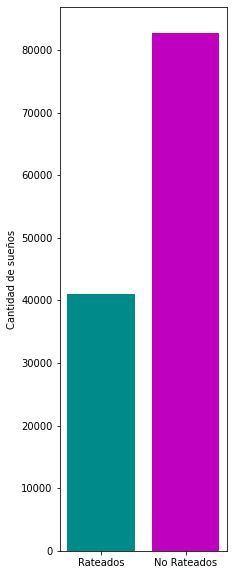

In [ ]:
ratevsnorate= [(ratings[5]+ratings[4]+ratings[3]+ratings[2]+ratings[1])],ratings[-1]

plt.figure(figsize=(3,10))
plt.bar(height = ratevsnorate, x = ["Rateados","No Rateados"], color = ["darkcyan","m"])
plt.ylabel("Cantidad de sueños")
plt.show()

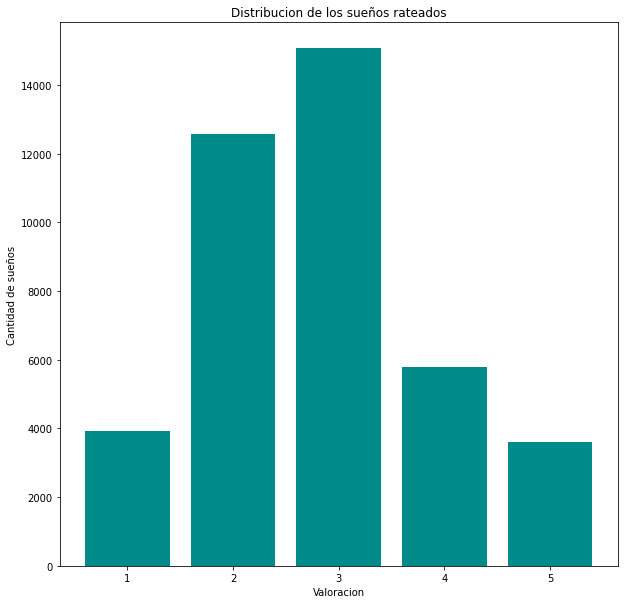

In [ ]:
iave = list(ratings.keys())
valore = list(ratings.values())

ordenao = [valore[4],valore[2],valore[1],valore[3],valore[5]]

plt.figure(figsize=(10,10))
plt.bar(height = ordenao, x = [1,2,3,4,5], color = "darkcyan")
plt.title("Distribucion de los sueños rateados")
plt.ylabel("Cantidad de sueños")
plt.xlabel("Valoracion")
plt.show()

In [ ]:
#CREO MIS DATAFRAMES Y DICCIONARIOS


dfRank = dfRank.loc[dfRank["rating"]>0] #elimino los suenios no rankeados == -1
dfPosRank = dfRank.loc[dfRank["rating"]>3] #asumo rank pos == mayor a 3
dfNegRank = dfRank.loc[dfRank["rating"]<3] #asumo rank neg == menor a 3

rank = dfRank["user"].value_counts().to_dict()
rankPos = dfPosRank["user"].value_counts().to_dict()
rankNeg = dfNegRank["user"].value_counts().to_dict()


#Distribucion de cantidad de publicaiones por usuarios




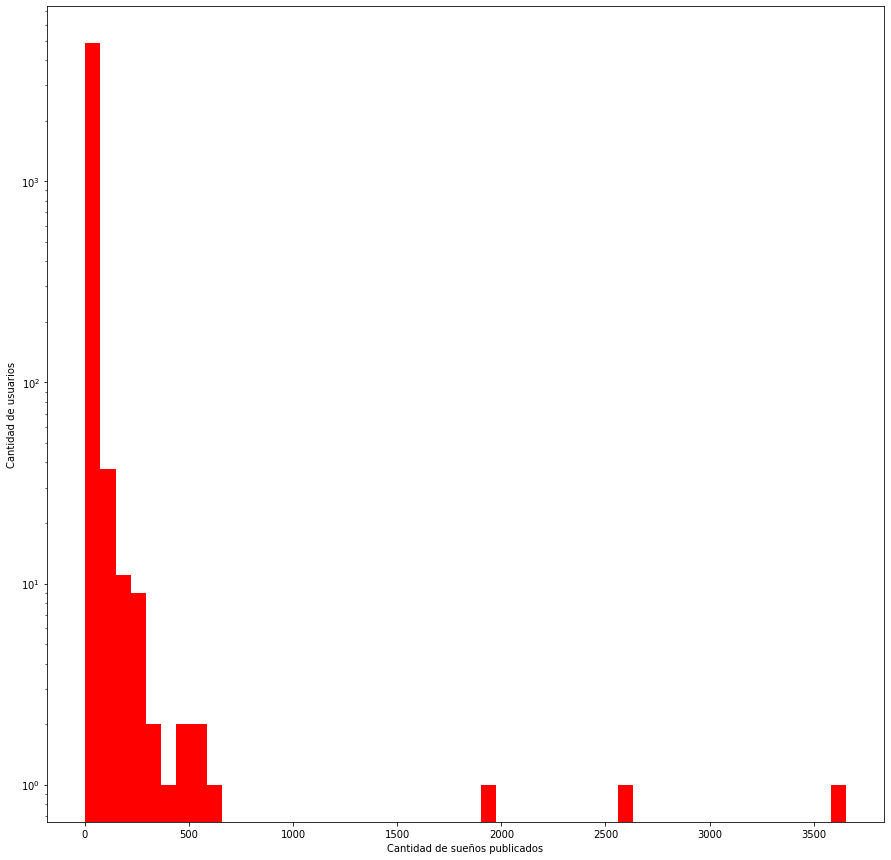

In [ ]:
plt.figure(figsize=(15,15))
plt.hist(rank.values(), bins = 50,color = "red")
#plt.xticks(np.arange(0,453,step=20))
plt.ylabel("Cantidad de usuarios")
plt.xlabel("Cantidad de sueños publicados")
plt.yscale('log')
plt.show()

##Distribucion de las entradas rateadas positiva y negativamente

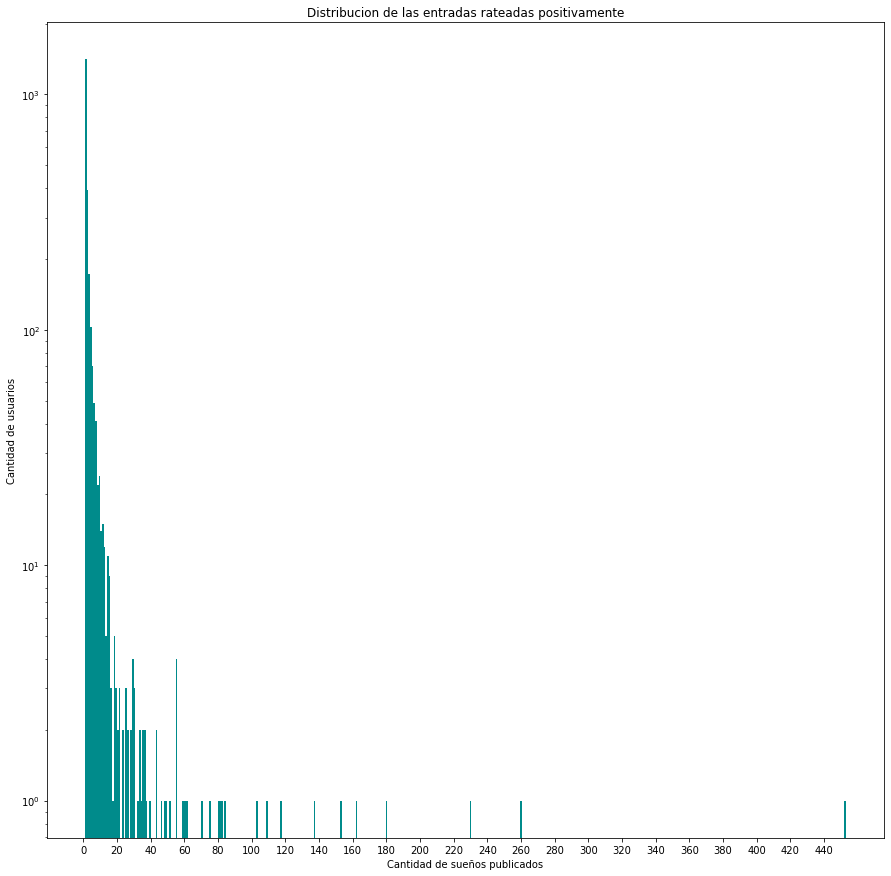

In [ ]:
plt.figure(figsize=(15,15))
plt.hist(rankPos.values(), bins = 453,color = "darkcyan")
plt.xticks(np.arange(0,453,step=20))
plt.title("Distribucion de las entradas rateadas positivamente")
plt.ylabel("Cantidad de usuarios")
plt.xlabel("Cantidad de sueños publicados")
plt.yscale('log')
plt.show()

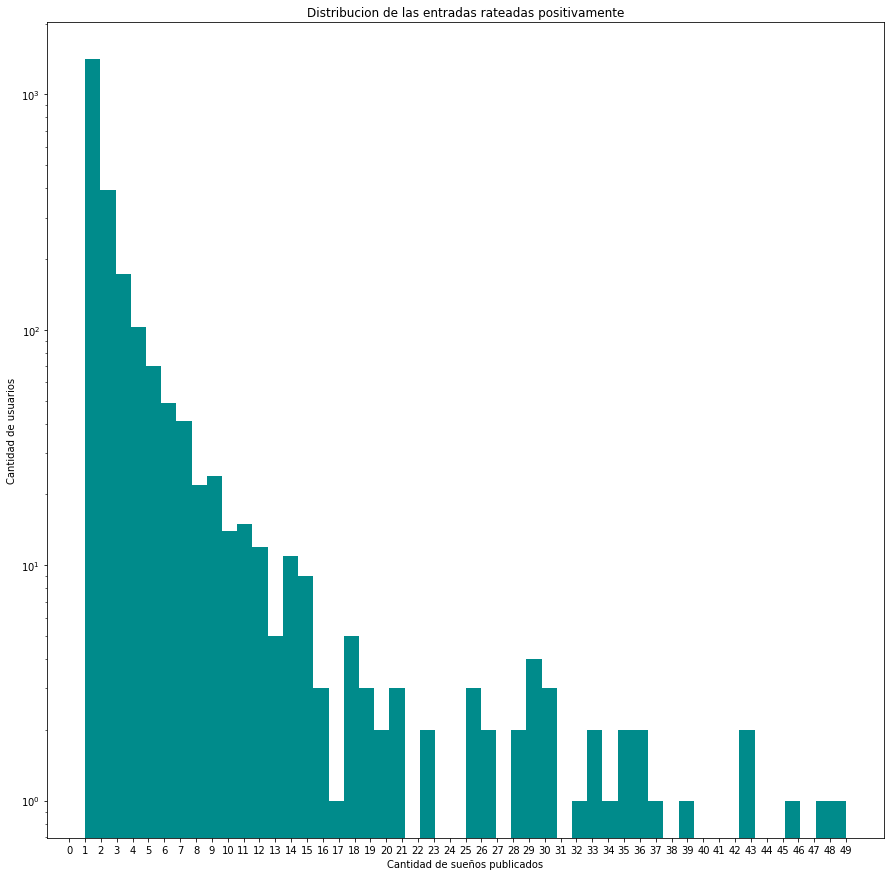

In [ ]:
lista_de_entradas = [x for x in rankPos.values() if x < 50]

plt.figure(figsize=(15,15))
plt.hist(lista_de_entradas, bins = 50,color = "darkcyan")
plt.xticks(np.arange(0,50,step=1))
plt.title("Distribucion de las entradas rateadas positivamente")
plt.ylabel("Cantidad de usuarios")
plt.xlabel("Cantidad de sueños publicados")
plt.yscale('log')
plt.show()

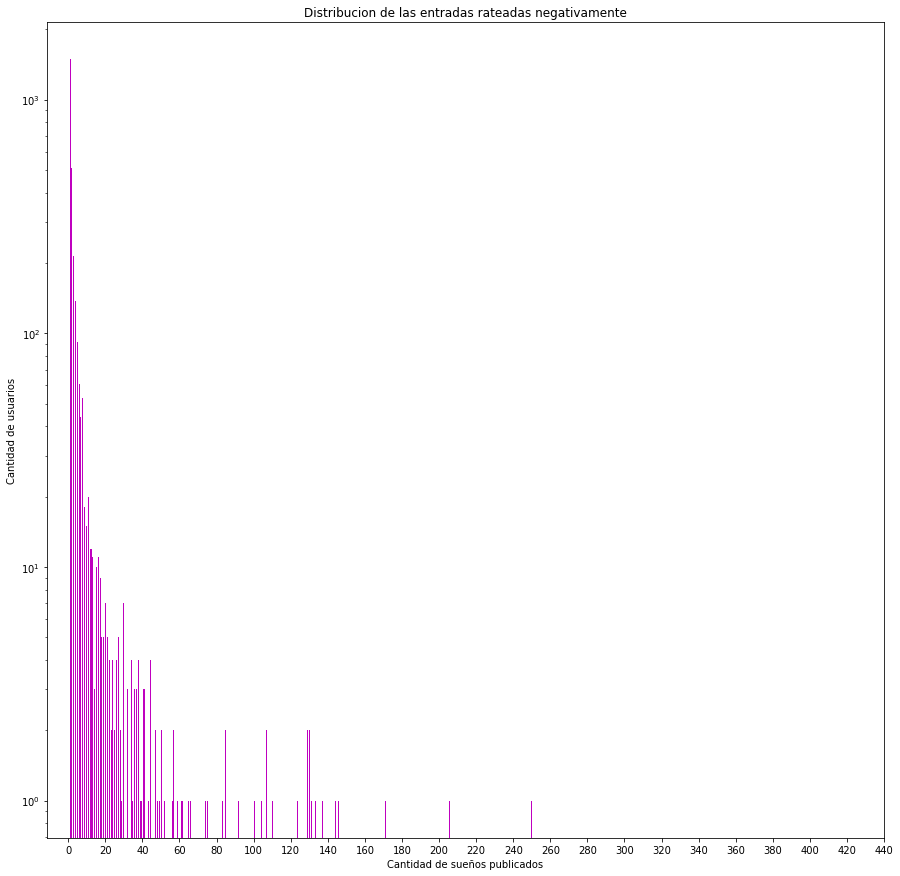

In [ ]:
lista_de_entradas3 = [x for x in rankNeg.values() if x < 453]

plt.figure(figsize=(15,15))
plt.hist(lista_de_entradas3, bins = 453,color = "m")
plt.xticks(np.arange(0,453,step=20))
plt.title("Distribucion de las entradas rateadas negativamente")
plt.ylabel("Cantidad de usuarios")
plt.xlabel("Cantidad de sueños publicados")
plt.yscale('log')
plt.show()

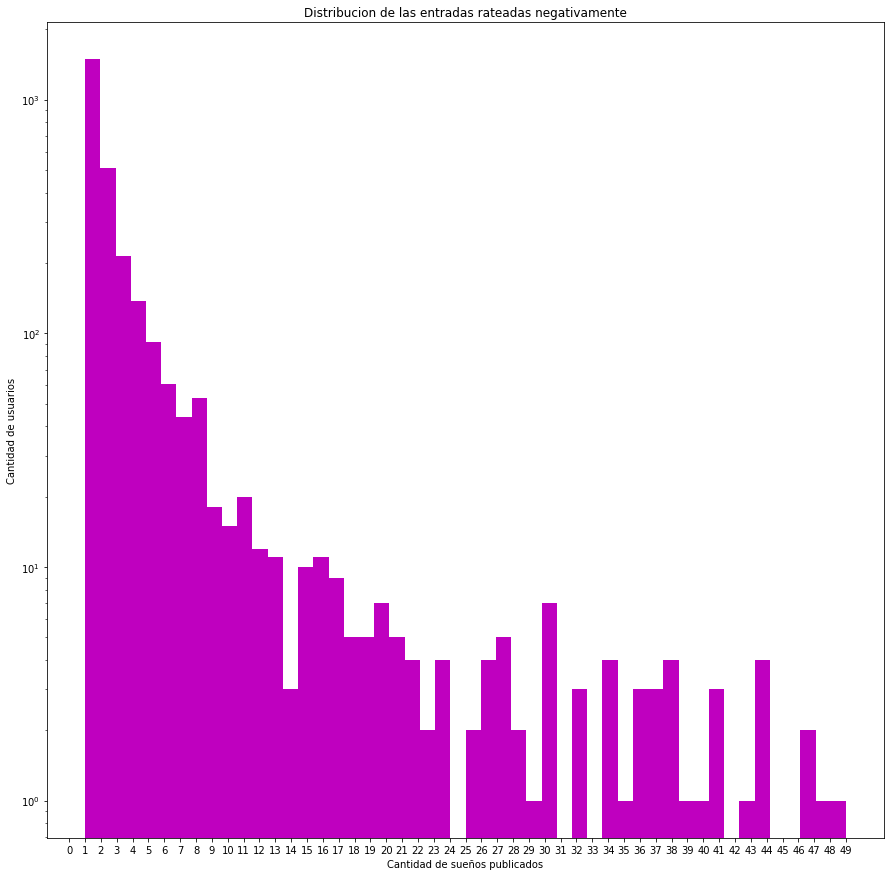

In [ ]:
lista_de_entradas2 = [x for x in rankNeg.values() if x < 50]

plt.figure(figsize=(15,15))
plt.hist(lista_de_entradas2, bins = 50,color = "m")
plt.xticks(np.arange(0,50,step=1))
plt.title("Distribucion de las entradas rateadas negativamente")
plt.ylabel("Cantidad de usuarios")
plt.xlabel("Cantidad de sueños publicados")
plt.yscale('log')
plt.show()

#Relacion Rank - Variables

##Rank-Lucidez

In [ ]:

dfLucidezRank = dfRank.drop(['cohesion', 'intent', 'raicesl','technique','url', 'user', 'dream', 'additional_comments', 'themes', 'settings','characters', 'emotions', 'activities', 'raices', 'text','raices_unidas'],inplace=False,axis=1)
dfLucidezRank = dfLucidezRank.loc[dfLucidezRank["lucidity"]>0] # elimino tambien los que no tienen informacion sobre la lucidez



In [ ]:
r = np.corrcoef(dfLucidezRank['lucidity'], dfLucidezRank['rating'])
r

array([[1.        , 0.26806776],
       [0.26806776, 1.        ]])

In [ ]:

oneHotRank = pd.get_dummies(dfLucidezRank.rating, prefix='Rating')
oneHotLucid = pd.get_dummies(dfLucidezRank.lucidity, prefix='Lucidity')


dfOneHot = oneHotRank.join(oneHotLucid)
y = dfOneHot.corr()
y = y.drop(['Lucidity_1.25', 'Lucidity_2.5', 'Lucidity_3.75', 'Lucidity_5.0'], axis=1)
y = y.drop(['Rating_1.0', 'Rating_2.0', 'Rating_3.0', 'Rating_4.0', 'Rating_5.0'], axis=0)
y

,Rating_1.0,Rating_2.0,Rating_3.0,Rating_4.0,Rating_5.0
Lucidity_1.25,0.005967,0.107570,0.062942,-0.070003,-0.140294
Lucidity_2.5,0.054085,-0.000342,0.017579,0.006114,-0.068559
Lucidity_3.75,-0.001867,-0.032375,-0.002489,0.034789,0.005238
Lucidity_5.0,-0.081456,-0.118571,-0.112133,0.053890,0.290973


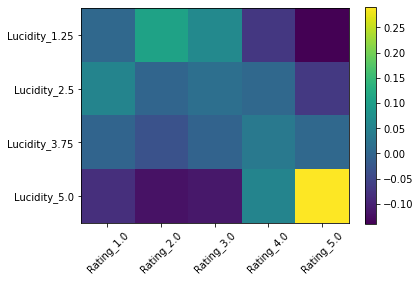

In [ ]:
plt.imshow(y)
plt.colorbar()
plt.xticks(range(len(y.columns)),y.columns, rotation=45)
plt.yticks(range(len(y)),y.index)
plt.show()
#ESTOY TRABAJANDO CON 9311 DATOS

##Rank-Cohesion

In [ ]:
dfCohesionRank = dfRank.drop(['intent', 'lucidity', 'raicesl', 'technique', 'url', 'user', 'dream', 'additional_comments', 'themes', 'settings','characters', 'emotions', 'activities', 'raices', 'text','raices_unidas'],inplace=False,axis=1)
dfCohesionRank.shape

(40988, 2)

In [ ]:
oneHotRank1 = pd.get_dummies(dfCohesionRank.rating, prefix='Rating')
oneHotCohesion = pd.get_dummies(dfCohesionRank.cohesion, prefix='Cohesion')


dfOneHot1 = oneHotRank1.join(oneHotCohesion)
y1 = dfOneHot1.corr()
y1 = y1.drop(['Cohesion_1.0','Cohesion_2.0','Cohesion_3.0','Cohesion_4.0','Cohesion_5.0'], axis=1)
y1 = y1.drop(['Rating_1.0', 'Rating_2.0', 'Rating_3.0', 'Rating_4.0', 'Rating_5.0'], axis=0)
y1

,Rating_1.0,Rating_2.0,Rating_3.0,Rating_4.0,Rating_5.0
Cohesion_1.0,0.086150,0.023698,0.005166,-0.071342,-0.049208
Cohesion_2.0,0.037143,0.099244,-0.036544,-0.049795,-0.076686
Cohesion_3.0,-0.057180,0.033834,0.076276,-0.025893,-0.093501
Cohesion_4.0,-0.058601,-0.059668,0.014516,0.107343,0.001425
Cohesion_5.0,-0.002970,-0.115955,-0.095139,0.053065,0.288200


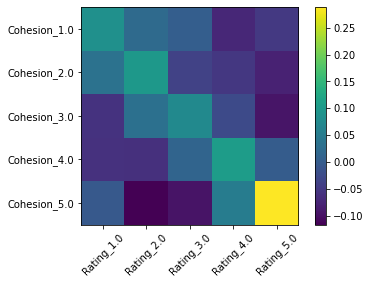

In [ ]:
plt.imshow(y1)
plt.colorbar()
plt.xticks(range(len(y1.columns)),y1.columns, rotation=45)
plt.yticks(range(len(y1)),y1.index)
plt.show()
#ESTOY TRABAJANDO CON 40988 DATOS

##Rank-Technique

In [ ]:
pepe = dfRank[(dfRank['technique'] != "-1")]#deleteo los q no le cargaron la tecnica que usaron
dfTechniqueRank = pepe.drop(['cohesion','intent', 'lucidity', 'raicesl', 'url', 'user', 'dream', 'additional_comments', 'themes', 'settings','characters', 'emotions', 'activities', 'raices', 'text','raices_unidas'],inplace=False,axis=1)
dfTechniqueRank.shape


(2797, 2)

In [ ]:
oneHotRank2 = pd.get_dummies(dfTechniqueRank.rating, prefix='Rating')
oneHotTechnique = pd.get_dummies(dfTechniqueRank.technique, prefix='Technique')

dfOneHot2 = oneHotRank2.join(oneHotTechnique)
y2 = dfOneHot2.corr()
y2 = y2.drop(['Technique_CAT','Technique_DILD','Technique_MILD','Technique_NILD','Technique_None','Technique_Other','Technique_RT','Technique_WBTB','Technique_WILD'], axis=1)
y2 = y2.drop(['Rating_1.0', 'Rating_2.0', 'Rating_3.0', 'Rating_4.0', 'Rating_5.0'], axis=0)
y2

,Rating_1.0,Rating_2.0,Rating_3.0,Rating_4.0,Rating_5.0
Technique_CAT,-0.015022,-0.029380,-0.008537,0.060826,-0.008472
Technique_DILD,0.058403,-0.033301,-0.003327,0.021132,-0.019977
Technique_MILD,0.052271,0.038732,-0.004870,-0.022238,-0.048814
Technique_NILD,0.023661,-0.023037,0.001220,0.011088,-0.003363
Technique_None,-0.040922,0.038914,0.023948,0.035976,-0.079402
Technique_Other,-0.076768,0.040986,0.020609,-0.021753,0.003765
Technique_RT,0.091036,0.003170,-0.056991,-0.037752,0.041887
Technique_WBTB,-0.003521,-0.064856,0.040824,0.022704,0.000877
Technique_WILD,-0.025704,-0.055419,-0.019192,0.006050,0.094176


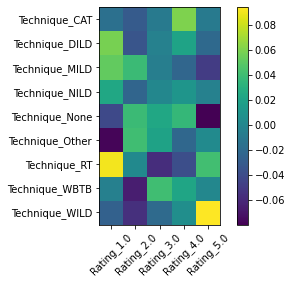

In [ ]:
plt.imshow(y2)
plt.colorbar()
plt.xticks(range(len(y2.columns)),y2.columns, rotation=45)
plt.yticks(range(len(y2)),y2.index)
plt.show()
#ESTOY TRABAJANDO CON 2797 DATOS

#Anlalisis de topicos por rating

#Clasificador de Suenios
